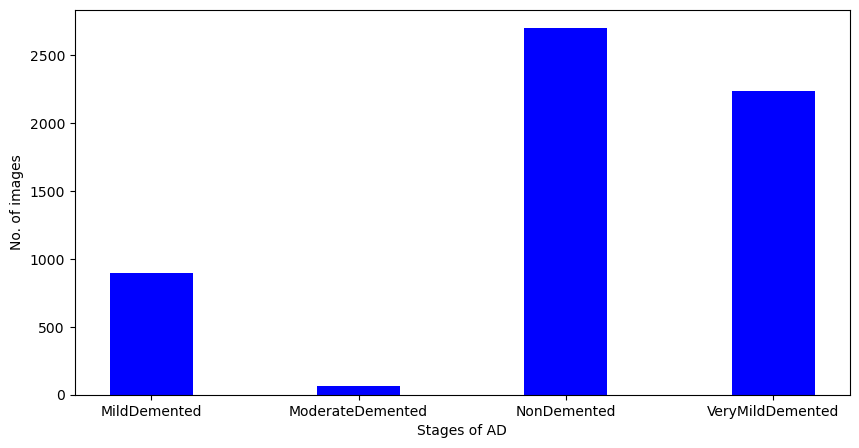

In [2]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'MildDemented': 896, 'ModerateDemented':64, 'NonDemented':2700,
        'VeryMildDemented':2240}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Stages of AD")
plt.ylabel("No. of images")
plt.show()
import matplotlib.pyplot as plt
 

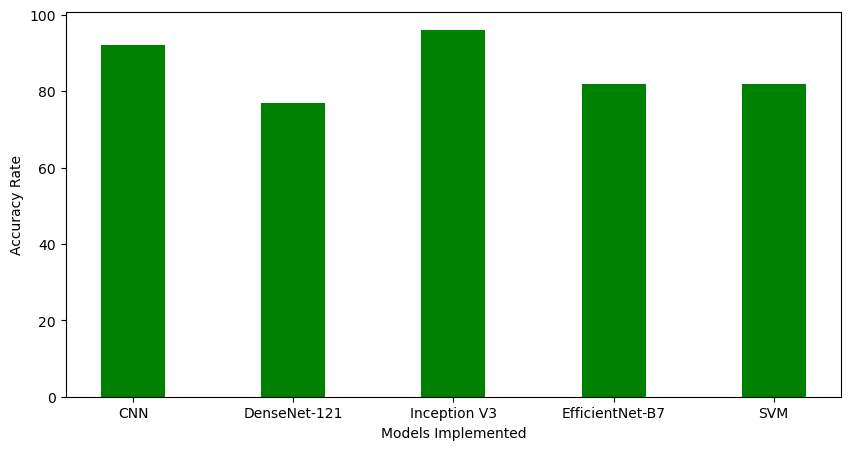

In [5]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'CNN': 92, 'DenseNet-121':77, 'Inception V3': 96,
        'EfficientNet-B7':82, 'SVM': 82}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='green',
        width = 0.4)
 
plt.xlabel("Models Implemented")
plt.ylabel("Accuracy Rate")
plt.show()
import matplotlib.pyplot as plt

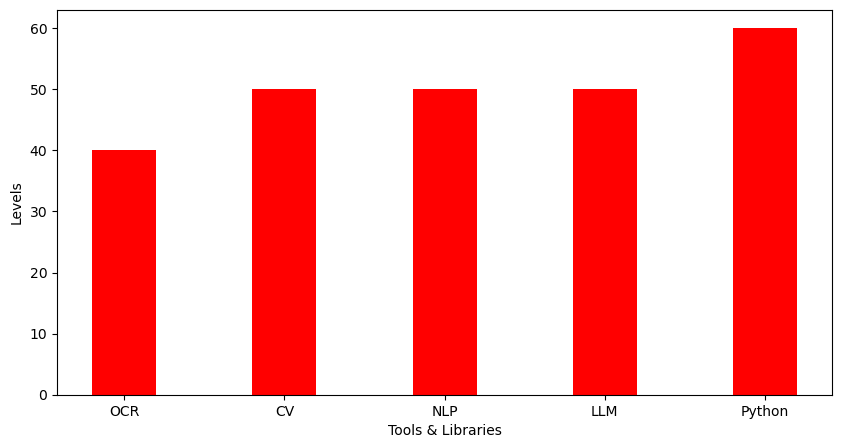

In [4]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'OCR': 40, 'CV':50, 'NLP': 50,
        'LLM':50, 'Python':60}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='red',
        width = 0.4)
 
plt.ylabel("Levels")
plt.xlabel("Tools & Libraries")
plt.show()


In [20]:
pip install nibabel

Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 3.3/3.3 MB 13.1 MB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

import os
from distutils.dir_util import copy_tree, remove_tree

from PIL import Image
from random import randint

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef as MCC
from sklearn.metrics import balanced_accuracy_score as BAS
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.layers import Flatten, Dense
import keras
import tensorflow_addons as tfa
from keras.utils.vis_utils import plot_model
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, MaxPool2D
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout,Activation
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import  image_dataset_from_directory
from tensorflow.keras.layers import Embedding, Reshape, LeakyReLU, Concatenate, UpSampling2D, Conv2DTranspose
import datetime
from IPython import display
import keras.backend as K
from tensorflow.keras.metrics import AUC

In [2]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation='sigmoid', input_shape=(784,)),
    tf.keras.layers.Dense(250, activation='sigmoid'),
    tf.keras.layers.Dense(100, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [28]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "D:/800 Project/dataset/Alzheimer_s Dataset/train",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=[180, 180],
    batch_size=16,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "D:/800 Project/dataset/Alzheimer_s Dataset/train",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=[180, 180],
    batch_size=16 ,
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "D:/800 Project/dataset/Alzheimer_s Dataset/test",
    seed=1337,
    image_size=[180, 180],
    batch_size=16 ,
)

Found 4800 files belonging to 4 classes.
Using 3840 files for training.
Found 4800 files belonging to 4 classes.
Using 960 files for validation.
Found 1279 files belonging to 4 classes.


In [6]:
classnames = train_ds.class_names
len(classnames),train_ds.class_names
NUM_IMAGES = []

for label in classnames:
    dir_name = "D:/800 Project/dataset/Alzheimer_s Dataset/train/" + label[:-2] +'ed'
    NUM_IMAGES.append(len([name for name in os.listdir(dir_name)]))
    
NUM_IMAGES,classnames



([896, 52, 2060, 1792],
 ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'])

In [7]:
X = np.array(NUM_IMAGES)
y = np.array(classnames)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
X_train = X_train.reshape((-1, 1))
X_test = X_test.reshape((-1, 1))


In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [2]:
z_dim = 100
batch_size = 1
DEFAULT_PATH = "D:/800 Project/dataset/3D_Dataset"
img_height=img_width=128
batch_size=256

In [3]:
from os import listdir
from os.path import join, isdir
class_name = np.array([f for f in listdir(DEFAULT_PATH) if isdir(join(DEFAULT_PATH, f))])
n_classes = len(class_name)

In [4]:
train_data = image_dataset_from_directory(DEFAULT_PATH,
                  validation_split=None,
                  seed=123,
                  color_mode='grayscale',
                  interpolation="nearest",
                  follow_links=False,
                  image_size=(img_height, img_width),
                  batch_size=batch_size)

Found 3521 files belonging to 4 classes.


In [5]:
def process(image,label):
    image = tf.cast(((tf.cast(image, tf.float32)/127.5) -1)  ,tf.float32)
    return image,label

train_data = train_data.map(process)

In [6]:
cat_label = Input((1,))
latent_input = Input((z_dim,))
img_rows = 128
img_cols = 128
channels = 1
img_shape = (img_rows, img_cols, channels)

gf = 64
df = 64

In [7]:
def conv2d(layer_in,n_filters,f_size=4,batchnorm=True,strides=2):
    g = Conv2D(n_filters, 
              kernel_size=f_size, 
              strides=strides, 
              padding='same')(layer_in)
    if batchnorm:
        g = BatchNormalization(momentum=0.8)(g, training=False)
    g = LeakyReLU(alpha=0.2)(g)
    return g 


def deconv2d(layer_in,skip_in,n_filters,f_size=4,dropout=False):
    g= UpSampling2D(size=2)(layer_in)

    g = Conv2D(n_filters, 
            kernel_size=f_size, 
            strides=1, 
            padding='same', 
            activation='relu')(g)
    if dropout:
        g = Dropout(0.5)(g)
 
    g = BatchNormalization(momentum=0.8)(g)
    g = Concatenate()([g, skip_in])
    return g

In [8]:
def generator_label_emb(layer_input : Input, num_cat : int = n_classes, embedding_input : int = z_dim) :
    label_embedding = Embedding(num_cat, embedding_input)(layer_input)
    d1 = Dense(8*8*1)(label_embedding)
    layer_reshape = Reshape((8,8,1))(d1)
    return layer_reshape

In [9]:
def generator_latent_dim(layer_input : Input, latente_dim : int = z_dim):
    d1 = Dense(8*8*256)(layer_input)
    d2 = BatchNormalization()(d1)
    d3 = LeakyReLU()(d2)
    layer_reshape = Reshape((8,8,256))(d3)
    return layer_reshape

In [10]:
def Input_generator(cat_label,latent_input) -> tf.keras.models.Model :
    
    gle = generator_label_emb(cat_label)
    gld = generator_latent_dim(latent_input)
    input = Concatenate()([gle, gld])

    return input

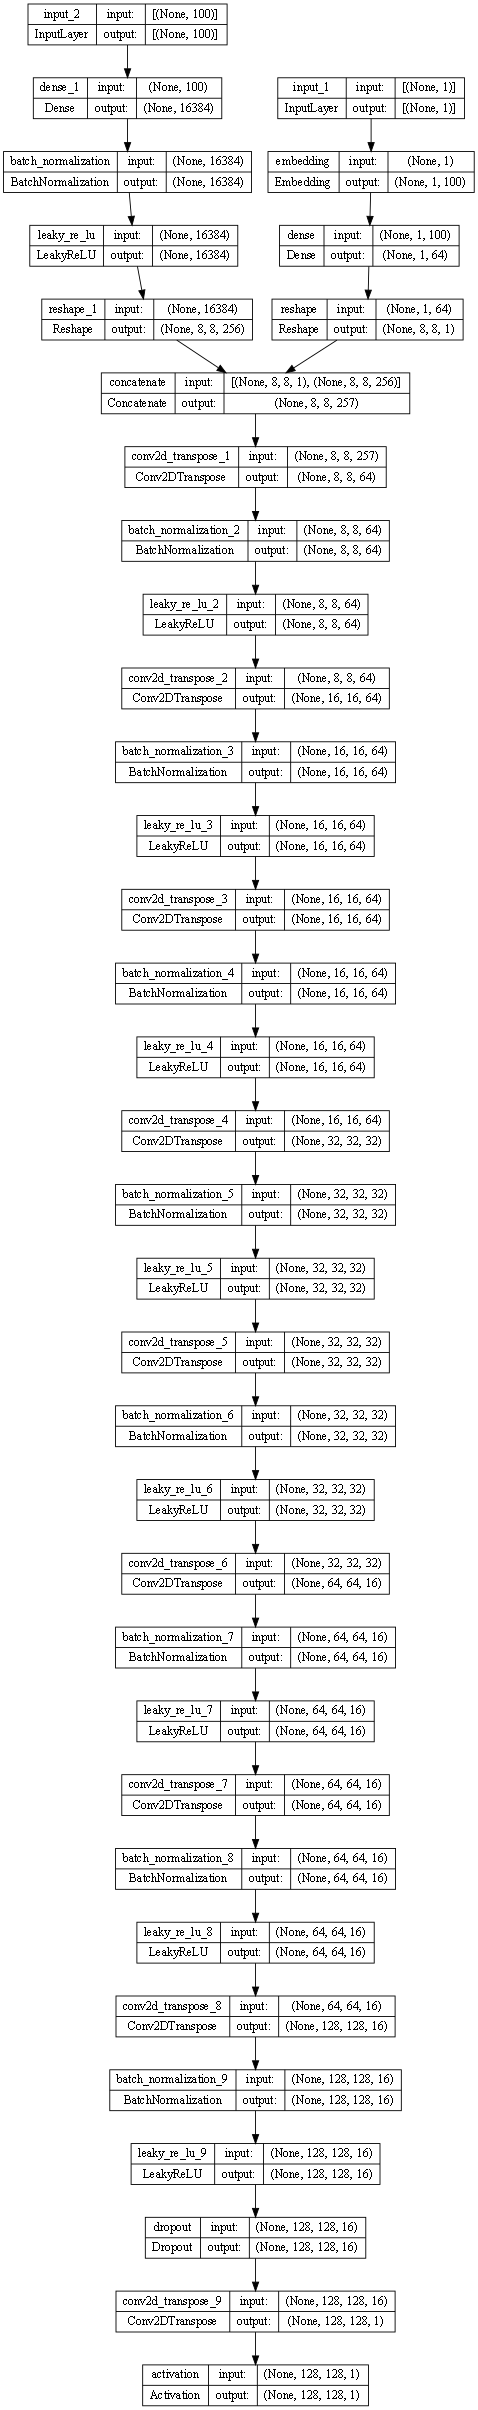

In [11]:
def build_generator():
    input = Input_generator(cat_label,latent_input)


    g = Conv2DTranspose(128,3,2,'same')(input)
    g = BatchNormalization()(g)
    g = LeakyReLU()(g)

    g = Conv2DTranspose(64,3,1,'same')(input)
    g = BatchNormalization()(g)
    g = LeakyReLU()(g)

    g = Conv2DTranspose(64,3,2,'same')(g)
    g = BatchNormalization()(g)
    g = LeakyReLU()(g)

    g = Conv2DTranspose(64,3,1,'same')(g)
    g = BatchNormalization()(g)
    g = LeakyReLU()(g)

    g = Conv2DTranspose(32,3,2,'same')(g)
    g = BatchNormalization()(g)
    g = LeakyReLU()(g)

    g = Conv2DTranspose(32,3,1,'same')(g)
    g = BatchNormalization()(g)
    g = LeakyReLU()(g)

    g = Conv2DTranspose(16,3,2,'same')(g)
    g = BatchNormalization()(g)
    g = LeakyReLU()(g)

    g = Conv2DTranspose(16,3,1,'same')(g)
    g = BatchNormalization()(g)
    g = LeakyReLU()(g)

    g = Conv2DTranspose(16,3,2,'same')(g)
    g = BatchNormalization()(g)
    g = LeakyReLU()(g)
    g = Dropout(0.3)(g)

    g = Conv2DTranspose(1,3,1,'same')(g)
    g = Activation('tanh')(g)


    return Model(inputs=[cat_label,latent_input], outputs=g)

generator = build_generator()
tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)

In [12]:
generator.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 16384)        1654784     ['input_2[0][0]']                
                                                                                                  
 embedding (Embedding)          (None, 1, 100)       400         ['input_1[0][0]']                
                                                                                              

                                                                                                  
 batch_normalization_9 (BatchNo  (None, 128, 128, 16  64         ['conv2d_transpose_8[0][0]']     
 rmalization)                   )                                                                 
                                                                                                  
 leaky_re_lu_9 (LeakyReLU)      (None, 128, 128, 16  0           ['batch_normalization_9[0][0]']  
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 128, 128, 16  0           ['leaky_re_lu_9[0][0]']          
                                )                                                                 
                                                                                                  
 conv2d_tr

In [13]:
shape_input=(128,128,1)

In [14]:
def discrimimator_label_emb(layer_input : Input, shape_input : tuple() = shape_input, num_cat : int = 10, embedding_input : int = z_dim) :
    label_embedding = Embedding(num_cat, embedding_input)(layer_input)
    d1 = Dense(shape_input[0]*shape_input[1]*shape_input[2])(label_embedding)
    layer_reshape = Reshape(shape_input)(d1)
  
    return layer_reshape

In [15]:
def discrimimator_input(shape_input : tuple() = shape_input, latente_dim : int = z_dim):
    layer_input = Input(shape_input)
    return layer_input

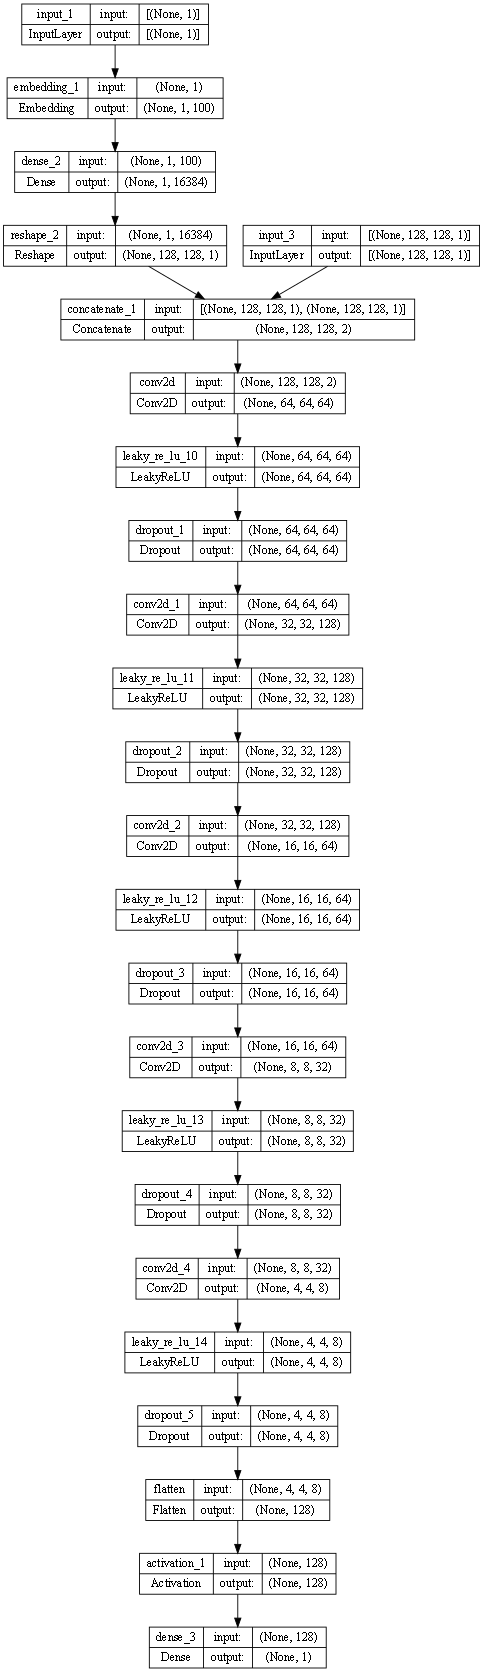

In [16]:
def discriminator(  ):
    layer_label_emb = discrimimator_label_emb(cat_label)
    layer_input =   discrimimator_input()
    concate = Concatenate()([layer_label_emb,layer_input]  )

    d = Conv2D(64,3,2,'same')(concate)
    d = LeakyReLU()(  d)
    d = Dropout(0.3)  (d)

    d = Conv2D(128,3  ,2,'same')(d)
    d = LeakyReLU()(  d)
    d = Dropout(0.3)  (d)

    d = Conv2D(64,3,  2,'same')(d)
    d = LeakyReLU()(d)
    d = Dropout(0.3)(d)

    d = Conv2D(32,3,2,'same')(d)
    d = LeakyReLU()(d)
    d = Dropout(0.3)(d)

    d = Conv2D(8,3,2,'same')(d)
    d = LeakyReLU()(d)
    d = Dropout(0.3)(d)

    d = Flatten()(d)
    d = Activation('sigmoid')(d)
    d = Dense(1)(d)


    model = Model(inputs=[layer_input,cat_label], outputs=d, name="discriminator")
    return model
discriminator = discriminator()
tf.keras.utils.plot_model(discriminator,to_file='discriminator.png', show_shapes=True, dpi=64)

In [17]:
discriminator.summary()

Model: "discriminator"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 100)       1000        ['input_1[0][0]']                
                                                                                                  
 dense_2 (Dense)                (None, 1, 16384)     1654784     ['embedding_1[0][0]']            
                                                                                                  
 reshape_2 (Reshape)            (None, 128, 128, 1)  0           ['dense_2[0][0]']                
                                                                                      

In [18]:
generator_optimizer = tf.optimizers.Adam(0.0001)
discriminator_optimizer = tf.optimizers.Adam(0.0001)

In [19]:
default_patch = "./"
checkpoint_dir = default_patch + '/check/'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)
log_dir = default_patch + "/logs/"

summary_writer = tf.summary.create_file_writer(
log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+'/')
rows=n_classes
cols=1
noises = np.random.normal(0, 1, (rows * cols, z_dim))
num_labels = np.arange(0, rows).reshape(-1, 1)

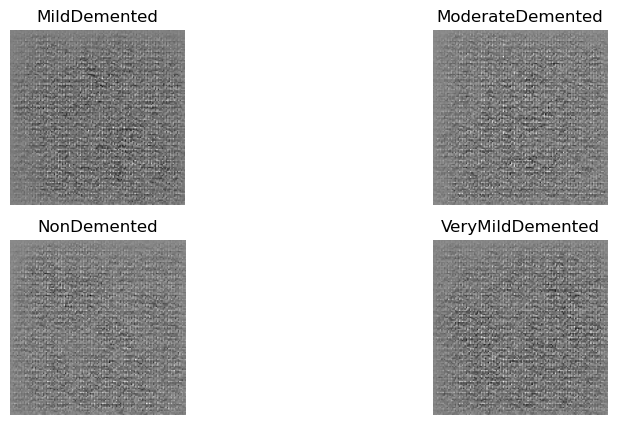

In [20]:
def sample_images(model, rows=2, cols=2):
    prediction = model([num_labels,noises], training=False)

    plot, axs = plt.subplots(rows, cols,figsize=(10, 5))  
   
    gen_imgs = [p for p in prediction]
    pos_img = 0
    for r in range(rows):
        for c in range(cols):
            axs[r,c].axis('off')
            axs[r,c].set_title(f'{class_name[pos_img]}')
            axs[r,c].imshow(gen_imgs[pos_img][:,:,0] * 0.5 + 0.5, cmap='gray')
            pos_img += 1
    plt.show()
sample_images(model=generator)

In [21]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)
def discrimantor_loss(disc_fake, disc_real, step, add_summary=True):
    
    loss_disc_real = loss_object(tf.ones_like(disc_real),disc_real)
  
    loss_disc_fake = loss_object(tf.zeros_like(disc_fake),disc_fake)
  
    loss_disc = (loss_disc_real + loss_disc_fake)

    if add_summary:
        with summary_writer.as_default():
            tf.summary.scalar('loss_disc_real', loss_disc_real, step = step // 1000)
            tf.summary.scalar('loss_disc_fake', loss_disc_fake, step = step // 1000)
            tf.summary.scalar('loss_disc', loss_disc, step = step // 1000)

    return loss_disc, loss_disc_real, loss_disc_fake

In [22]:
def generator_loss(gen_out, step):  
    loss_gen_out = loss_object(tf.ones_like(gen_out),gen_out)

    with summary_writer.as_default():
        tf.summary.scalar('loss_gen_out', loss_gen_out, step = step // 1000)

    return loss_gen_out

In [23]:
def train_step(input_image, input_label, generator, discriminator, step):
    z_noise  = np.random.normal(0,1,(input_label.shape[0], z_dim))
    assert z_noise.shape == (input_label.shape[0], z_dim)
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape_real, tf.GradientTape() as disc_tape_fake:
        gen_out = generator([input_label,z_noise], training=True)

    #Train Discriminator
        disc_fake = discriminator([gen_out, input_label], training=True)
        disc_real = discriminator([input_image, input_label], training=True)

    #Loss Discriminator
        loss_disc, loss_disc_real, loss_disc_fake = discrimantor_loss(disc_fake, disc_real, step)

    #Loss Generator
        loss_gen_out = generator_loss(disc_fake, step)

    
  #Generator Gradiente
    generator_gradients = gen_tape.gradient(loss_gen_out,generator.trainable_variables)
    generator_optimizer.apply_gradients(zip(generator_gradients,generator.trainable_variables))

  #Discriminator Gradiente to real imagens
    discriminator_gradients = disc_tape_real.gradient(loss_disc_real,discriminator.trainable_variables)
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients,discriminator.trainable_variables))

  #Discriminator Gradiente to fake imagens
    discriminator_gradients = disc_tape_fake.gradient(loss_disc_fake,discriminator.trainable_variables)
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients,discriminator.trainable_variables))
 

In [24]:
def fit(interations):
    start = datetime.datetime.now()
    start_1k = datetime.datetime.now()
    for (step, input_image) in train_data.repeat().take(interations).enumerate():
        train_step(input_image[0], input_image[1], generator, discriminator, step)

    if( (step+1) % 1000 == 0):
        checkpoint.save(file_prefix=checkpoint_prefix)
        display.clear_output(wait=True)
        print(f'Time per 1k steps:{datetime.datetime.now()-start_1k}')
        start_1k = datetime.datetime.now()
        print(f'step: {(step+1)//1000}k')
        sample_images(generator)
        print(f'Total time:{datetime.datetime.now()-start}')

In [ ]:
fit(5)

In [47]:
for dirname, _, filenames in os.walk("D:/800 Project/dataset/Alzheimer_s Dataset/"):
    for filename in filenames:
        
        
        
               
        print(os.path.join(dirname, filename))

D:/800 Project/dataset/Alzheimer_s Dataset/test\MildDemented\26 (19).jpg
D:/800 Project/dataset/Alzheimer_s Dataset/test\MildDemented\26 (20).jpg
D:/800 Project/dataset/Alzheimer_s Dataset/test\MildDemented\26 (21).jpg
D:/800 Project/dataset/Alzheimer_s Dataset/test\MildDemented\26 (22).jpg
D:/800 Project/dataset/Alzheimer_s Dataset/test\MildDemented\26 (23).jpg
D:/800 Project/dataset/Alzheimer_s Dataset/test\MildDemented\26 (24).jpg
D:/800 Project/dataset/Alzheimer_s Dataset/test\MildDemented\26 (25).jpg
D:/800 Project/dataset/Alzheimer_s Dataset/test\MildDemented\26 (26).jpg
D:/800 Project/dataset/Alzheimer_s Dataset/test\MildDemented\26 (27).jpg
D:/800 Project/dataset/Alzheimer_s Dataset/test\MildDemented\26 (28).jpg
D:/800 Project/dataset/Alzheimer_s Dataset/test\MildDemented\26.jpg
D:/800 Project/dataset/Alzheimer_s Dataset/test\MildDemented\27 (10).jpg
D:/800 Project/dataset/Alzheimer_s Dataset/test\MildDemented\27 (11).jpg
D:/800 Project/dataset/Alzheimer_s Dataset/test\MildDeme

In [22]:
import nibabel as nib

from scipy import ndimage


def read_nifti_file(filepath):
    """Read and load volume"""
    # Read file
    scan = nib.load(filepath)
    # Get raw data
    scan = scan.get_fdata()
    return scan


def normalize(volume):
    """Normalize the volume"""
    min = -1000
    max = 400
    volume[volume < min] = min
    volume[volume > max] = max
    volume = (volume - min) / (max - min)
    volume = volume.astype("float32")
    return volume


def resize_volume(img):
    """Resize across z-axis"""
    # Set the desired depth
    desired_depth = 64
    desired_width = 128
    desired_height = 128
    # Get current depth
    current_depth = img.shape[-1]
    current_width = img.shape[0]
    current_height = img.shape[1]
    # Compute depth factor
    depth = current_depth / desired_depth
    width = current_width / desired_width
    height = current_height / desired_height
    depth_factor = 1 / depth
    width_factor = 1 / width
    height_factor = 1 / height
    # Rotate
    img = ndimage.rotate(img, 90, reshape=False)
    # Resize across z-axis
    img = ndimage.zoom(img, (width_factor, height_factor, depth_factor), order=1)
    return img


def process_scan(path):
    """Read and resize volume"""
    # Read scan
    volume = read_nifti_file(path)
    # Normalize
    volume = normalize(volume)
    # Resize width, height and depth
    volume = resize_volume(volume)
    return volume

In [24]:
mild_demented = [
    os.path.join(os.getcwd(), "D:/800 Project/dataset/3D_Dataset/MildDemented", i)
    for i in os.listdir("D:/800 Project/dataset/3D_Dataset/MildDemented")
]
# Folder "CT-23" consist of CT scans having several ground-glass opacifications,
# involvement of lung parenchyma.
moderate_demented = [
    os.path.join(os.getcwd(), "D:/800 Project/dataset/3D_Dataset/ModerateDemented", i)
    for i in os.listdir("D:/800 Project/dataset/3D_Dataset/ModerateDemented")
]

non_demented = [
    os.path.join(os.getcwd(), "D:/800 Project/dataset/3D_Dataset/NonDemented", i)
    for i in os.listdir("D:/800 Project/dataset/3D_Dataset/NonDemented")
]

vmild_demented = [
    os.path.join(os.getcwd(), "D:/800 Project/dataset/3D_Dataset/VeryMildDemented", i)
    for i in os.listdir("D:/800 Project/dataset/3D_Dataset/VeryMildDemented")
]

print("MRI scans of Mild Demented: " + str(len(mild_demented)))
print("MRI scans of Moderate Demented: " + str(len(moderate_demented)))
print("MRI scans of Non Demented: " + str(len(non_demented)))
print("MRI scans of Very Mildly Demented: " + str(len(vmild_demented)))


MRI scans of Mild Demented: 717
MRI scans of Moderate Demented: 64
MRI scans of Non Demented: 2700
MRI scans of Very Mildly Demented: 2240


In [30]:
data_dir = 'D:/800 Project/dataset/3D_Dataset/'
classes = os.listdir(data_dir)
num_classes = len(classes)

X_train = []
y_train = []
X_test = []
y_test = []

for i, cls in enumerate(classes):
    img_paths = os.listdir(os.path.join(data_dir, cls))
    num_imgs = len(img_paths)
    train_imgs = img_paths[:int(num_imgs*0.8)]
    test_imgs = img_paths[int(num_imgs*0.8):]
    for img_path in train_imgs:
        img = tf.keras.preprocessing.image.load_img(os.path.join(data_dir, cls, img_path), target_size=(32, 32))
        img = tf.keras.preprocessing.image.img_to_array(img)
        X_train.append(img)
        y_train.append(i)
    for img_path in test_imgs:
        img = tf.keras.preprocessing.image.load_img(os.path.join(data_dir, cls, img_path), target_size=(32, 32))
        img = tf.keras.preprocessing.image.img_to_array(img)
        X_test.append(img)
        y_test.append(i)

X_train = np.array(X_train).astype('float32') / 255.0
X_test = np.array(X_test).astype('float32') / 255.0
y_train = np.array(y_train)
y_test = np.array(y_test)

                  


In [31]:
X_train = tf.reshape(X_train, (-1, 32, 32, 1))
X_test = tf.reshape(X_test, (-1, 32, 32, 1))